In [ ]:
!git clone https://github.com/Jelwin13afc/FakeNewsDetection

Cloning into 'FakeNewsDetection'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 18), reused 18 (delta 7), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [ ]:
import pandas as pd
news=pd.read_csv('/content/finalHindiDataset_withEmojis.csv')


In [ ]:
"""
#add additional true news data
df_data = pd.read_csv('/content/FakeNewsDetection/more_true_news.csv', sep="\t", encoding='utf-8', header=None)

# true_news=true_news.drop(['long_description','full_title'],axis=1)
fake_news=fake_news.drop(['short_description','full_title'],axis=1)

df_data = df_data.drop(0,axis=1)
df_data = df_data.rename(columns={1:"long_description"})
df_data=df_data.dropna()
true_news = df_data

# frame = [true_news, df_data]
# true_news = pd.concat(frame, ignore_index=True)

# true_news=true_news.drop(['Unnamed: 0'],axis=1)
fake_news=fake_news.drop(['Unnamed: 0'],axis=1)
"""

'\n#add additional true news data\ndf_data = pd.read_csv(\'/content/FakeNewsDetection/more_true_news.csv\', sep="\t", encoding=\'utf-8\', header=None)\n\n# true_news=true_news.drop([\'long_description\',\'full_title\'],axis=1)\nfake_news=fake_news.drop([\'short_description\',\'full_title\'],axis=1)\n\ndf_data = df_data.drop(0,axis=1)\ndf_data = df_data.rename(columns={1:"long_description"})\ndf_data=df_data.dropna()\ntrue_news = df_data\n\n# frame = [true_news, df_data]\n# true_news = pd.concat(frame, ignore_index=True)\n\n# true_news=true_news.drop([\'Unnamed: 0\'],axis=1)\nfake_news=fake_news.drop([\'Unnamed: 0\'],axis=1)\n'

In [ ]:
#true_news=true_news.drop(['Unnamed: 0'],axis=1)
#fake_news=fake_news.drop(['Unnamed: 0'],axis=1)

In [ ]:
# make both length equal
"""
if len(fake_news) > len(true_news):
  fake_news = fake_news.head(len(true_news))
elif len(true_news) > len(fake_news):
  true_news = true_news.head(len(fake_news))
print("Length of fake news: ", len(fake_news))
print("Length of true news: ", len(true_news))
"""

Length of fake news:  760
Length of true news:  760


In [ ]:
news.tail()

,Unnamed: 0,Label,Aug_text,translated_text,word_count,Emojis,Unnamed: 6,Unnamed: 7,Unnamed: 8
9902,9902,1.0,4. The IMF's refusal to lend to Pakistan has s...,आईएमएफ के पाकिस्तान को ऋण देने से इनकार करने स...,57,neutral,NaN,NaN,NaN
9903,9903,1.0,nobody caught Modi's lie! '3 crore' beneficiar...,मोदी के झूठ को किसी ने नहीं पकड़ा! सिर्फ 21 घं...,13,neutral,NaN,NaN,NaN
9904,9904,1.0,We uncovered Modi's deception! '3 crore' benef...,हमने मोदी के धोखे का पर्दाफाश किया! '3 करोड़' ...,12,neutral,NaN,NaN,NaN
9905,9905,1.0,Modi's falsehood was exposed! '3 crore' benefi...,मोदी का झूठ उजागर! सिर्फ 21 घंटे में '3 करोड़'...,12,neutral,NaN,NaN,NaN
9906,9906,1.0,We exposed Modi's fabrication! '3 crore' benef...,हमने मोदी के बनावट का पर्दाफाश किया! '3 करोड़'...,12,neutral,NaN,NaN,NaN


In [ ]:
news= news.drop(columns=['Unnamed: 0','Unnamed: 6','Unnamed: 7','Unnamed: 8','Aug_text','word_count','Emojis'])

In [ ]:
news


,Label,translated_text
0,0.0,भारत के लिए ऐतिहासिक महत्व और राष्ट्रीय आनंद क...
1,0.0,भारत के लिए एक महत्वपूर्ण अवसर - भगवान राम के ...
2,0.0,आज भारत के गृह मंत्री के रूप में किसी और ने पद...
3,0.0,मैं आज भारत के गृह मंत्री के रूप में पदभार ग्र...
4,0.0,मैंने आज भारत के गृह मंत्री की भूमिका निभाई है।
...,...,...
9902,1.0,आईएमएफ के पाकिस्तान को ऋण देने से इनकार करने स...
9903,1.0,मोदी के झूठ को किसी ने नहीं पकड़ा! सिर्फ 21 घं...
9904,1.0,हमने मोदी के धोखे का पर्दाफाश किया! '3 करोड़' ...
9905,1.0,मोदी का झूठ उजागर! सिर्फ 21 घंटे में '3 करोड़'...


In [ ]:
import tensorflow as tf
# Get the GPU device name.
device_name = tf.test.gpu_device_name()
# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

In [ ]:
news = news.dropna(subset=['Label'])


In [ ]:
#split train test
from sklearn.model_selection import train_test_split
train, test, labels, y_test = train_test_split(news, news['Label'], test_size=0.2, stratify=news['Label'],random_state=123, shuffle=True)

sentences = train.translated_text.values
Labels=train.Label.values

In [ ]:
from transformers import ElectraTokenizer
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = ElectraTokenizer.from_pretrained('monsoon-nlp/hindi-tpu-electra', do_lower_case=True) #bert-base-uncased

Loading BERT tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/607k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/736 [00:00<?, ?B/s]

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:
    # `encode` will:  (1) Tokenize the sentence.   (2) Prepend the `[CLS]` token to the start.  (3) Append the `[SEP]` token to the end. (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,
                        add_special_tokens = True,  # Add '[CLS]' and '[SEP]'
                        # max_length = 64,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)
# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  भगवन पार्टी एक वायरल वीडियो में एक लड़की पर क्रूरतापूर्वक हमला करते हुए देखे गए व्यक्तियों से जुड़ी हुई है।
Token IDs: [3, 29788, 3256, 1909, 18181, 4781, 1889, 1909, 7014, 1912, 21384, 5251, 4980, 2156, 2159, 7202, 2267, 4803, 1901, 7045, 2281, 1886, 507, 4]


<Axes: >

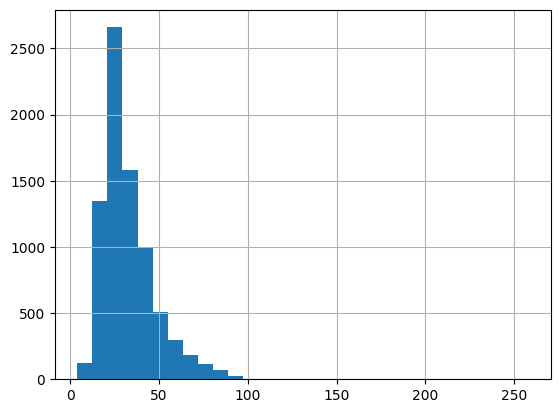

In [ ]:
seq_len = [len(sen) for sen in input_ids]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  258


In [ ]:
# We'll borrow the `pad_sequences` utility function to do padding.
from keras.preprocessing.sequence import pad_sequences
# Set the maximum sequence length as 128 , as it should be slightly above 105
MAX_LEN = 96
print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)
print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))
# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence, as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")
print('\Done.')


Padding/truncating all sentences to 96 values...

Padding token: "[PAD]", ID: 2
\Done.


In [ ]:
# Create attention masks
attention_masks = []
for sent in input_ids:

    # Create the attention mask. If a token ID is 0, then it's padding, set the mask to 0. If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for training, 10% validation
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, Labels,
                                                            random_state=123, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, Labels,
                                             random_state=123, test_size=0.1)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# The DataLoader needs to know our batch size for training, so we specify it here.
batch_size = 32
# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import  ElectraForSequenceClassification, AdamW, BertConfig
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model =  ElectraForSequenceClassification.from_pretrained(
    "monsoon-nlp/hindi-tpu-electra", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 1, # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monsoon-nlp/hindi-tpu-electra and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(39628, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

electra.embeddings.word_embeddings.weight               (39628, 768)
electra.embeddings.position_embeddings.weight             (512, 768)
electra.embeddings.token_type_embeddings.weight             (2, 768)
electra.embeddings.LayerNorm.weight                           (768,)
electra.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

electra.encoder.layer.0.attention.self.query.weight       (768, 768)
electra.encoder.layer.0.attention.self.query.bias             (768,)
electra.encoder.layer.0.attention.self.key.weight         (768, 768)
electra.encoder.layer.0.attention.self.key.bias               (768,)
electra.encoder.layer.0.attention.self.value.weight       (768, 768)
electra.encoder.layer.0.attention.self.value.bias             (768,)
electra.encoder.layer.0.attention.output.dense.weight     (768, 768)
electra.encoder.layer.0.attention.output.dense.bias           (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

epochs = 5
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, Labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = Labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np
import torch
import time
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
start = time.time()

for epoch_i in range(0, epochs):
    # ========================================
    #               Training
    # ========================================
    print("")
    print(f'======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print(f'  Batch {step}  of  {len(train_dataloader)}.    Elapsed: {elapsed}.')

        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device).float().unsqueeze(1)  # Ensure labels are float and reshaped to [batch_size, 1]

        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()

        # Perform a forward pass. This will return the loss.
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the loss value out of the tuple.
        loss = outputs.loss

        # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. `loss` is a Tensor containing a single value.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0 to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print(f"  Average training loss: {avg_train_loss:.2f}")
    print(f"  Training epoch took: {format_time(time.time() - t0)}")

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions. This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the logits output by the model
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print(f"  Accuracy: {eval_accuracy/nb_eval_steps:.2f}")
    print(f"  Validation took: {format_time(time.time() - t0)}")
print("")
print("Training complete!")
end = time.time()



======== Epoch 1 / 5 ========
Training...
  Batch 40  of  223.    Elapsed: 0:00:23.
  Batch 80  of  223.    Elapsed: 0:00:44.
  Batch 120  of  223.    Elapsed: 0:01:05.
  Batch 160  of  223.    Elapsed: 0:01:25.
  Batch 200  of  223.    Elapsed: 0:01:47.

  Average training loss: 0.84
  Training epoch took: 0:01:59

Running Validation...
  Accuracy: 0.17
  Validation took: 0:00:05

======== Epoch 2 / 5 ========
Training...
  Batch 40  of  223.    Elapsed: 0:00:21.
  Batch 80  of  223.    Elapsed: 0:00:42.
  Batch 120  of  223.    Elapsed: 0:01:03.
  Batch 160  of  223.    Elapsed: 0:01:24.
  Batch 200  of  223.    Elapsed: 0:01:45.

  Average training loss: 0.84
  Training epoch took: 0:01:57

Running Validation...
  Accuracy: 0.17
  Validation took: 0:00:05

======== Epoch 3 / 5 ========
Training...
  Batch 40  of  223.    Elapsed: 0:00:21.
  Batch 80  of  223.    Elapsed: 0:00:42.
  Batch 120  of  223.    Elapsed: 0:01:03.
  Batch 160  of  223.    Elapsed: 0:01:24.
  Batch 200  of  

In [ ]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
# Store the average loss after each epoch so we can plot them.
loss_values = []
start=time.time()
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        #b_labels = batch[2].to(device).float().unsqueeze(1)  # Ensure labels are float and reshaped to [batch_size, 1]

        # Always clear any previously calculated gradients before performing a backward pass.

        model.zero_grad()
        # Perform a forward pass .This will return the loss .
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the loss value out of the tuple.
        loss = outputs[0]
        # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. `loss` is a Tensor containing a single value
        total_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0. This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently during evaluation.
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and  speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions. This will return the logits rather than the loss because we have not provided labels.
            # token_type_ids is the same as the "segment ids"
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model.
        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
        nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")
end=time.time()


======== Epoch 1 / 5 ========
Training...


RuntimeError: Found dtype Double but expected Float

In [ ]:
import plotly.express as px
f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

In [ ]:
sentences = test.translated_text.values
labels = y_test.values
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:

    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256
                   )

    input_ids.append(encoded_sent)
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                          dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)
# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
# Set the batch size.
batch_size = 32
# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
# Put model in evaluation mode
model.eval()

predictions , true_labels = [], []
# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch


  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
print('DONE.')

Predicting labels for 1,980 test sentences...
DONE.


In [ ]:
count=0
guesses=[]
actual=[]
# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0" and one column for "1"). Pick the label with the highest value and turn this in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()


  #calculate accuracy
  for j in range(len(pred_labels_i)):
    if(pred_labels_i[j]==true_labels[i][j]):
      count+=1
    guesses.append(pred_labels_i[j])
    actual.append(true_labels[i][j])


accuracy = count/len(y_test)

In [ ]:
print(accuracy)

0.16313131313131313


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


print(accuracy_score(actual, guesses))
print(recall_score(actual, guesses))
print(precision_score(actual, guesses))
print(f1_score(actual, guesses))

0.16313131313131313
0.0
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print(end-start)

242.0272388458252
